In [10]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

# pip install numpy
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

import datetime as dt # For defining dates

import time

# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")

**Constants**

In [11]:
# Save the stocks data downloaded
PATH = '../raw_data/data_stocks/'
# File with all the tickers to be downloaded
tickers_path = '../raw_data/stocks_ticker/VL_5000_stocks.csv'
sector_path = '../raw_data/stocks_ticker/Big_stocks_data_ticker.csv'

# Start end date defaults
S_DATE = '2017-02-01'
E_DATE = '2022-12-06'
S_DATE_DT = pd.to_datetime(S_DATE)
E_DATE_DT = pd.to_datetime(E_DATE)

sdate = '2017-02-01'
edate = '2022-04-19'

risk_free_rate = 0.0125 # Approximate 10 year bond rate

# Stocks Data Retrieve

## Get all Stocks Downloaded in List

In [13]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# tickers.remove('.ds_Store') # MacOS Only

tickers.sort()
len(tickers)

2923

In [14]:
tickers_df = pd.DataFrame(tickers, columns = ['Ticker'] )
tickers_df

,Ticker
0,.DS_Store
1,A
2,AA
3,AAL
4,AAME
...,...
2918,ZUMZ
2919,ZUO
2920,ZVO
2921,ZYNE


## Get Dataframe from CSV

In [15]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_stock_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col=0)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

## Merge Multiple Stocks in One Dataframe by Column Name

In [16]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_stock_df_from_csv(x)
        
        # NEW Check if your dataframe has duplicate indexes
        #Delete duplicates 
#         if not df.index.is_unique:
#             df = df.loc[~df.index.duplicated() # :]
        
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

# Markowitz Portfolio Optimization

Harry Markowitz proved that you could make what is called an efficient portfolio. That is a portfolio that optimizes return while also minimizing risk. We don't benefit from analyzing individual securities at the same rate as if we instead considered a portfolio of stocks.

We do this by creating portfolios with stocks that are not correlated. We want to calculate expected returns by analyzing the returns of each stock multiplied by its weight.

$w_{1}r_{1} + w_{2}r_{2} = r_{p}$

The standard deviation of the portfolio is found this way. Sum multiple calculations starting by finding the product of the first securities weight squared times its standard deviation squared. The middle is 2 times the correlation coefficient between the stocks. And, finally add those to the weight squared times the standard deviation squared for the second security.

$(w_{1}\sigma_{1} + w_{2}\sigma_{2})^{2} = w^{2}_{1}\sigma^{2}_{1} + 2w_{1}\sigma_{1}w_{2}\sigma_{2}\rho_1 + w^{2}_{2}\sigma^{2}_{2}$

## Plotting an Efficient Frontier

### Stock Portfolio

In [69]:
# 1ST LIST port_list = ['CALX', 'NOVT', 'BLDR', 'DXCM', 'RGEN', 'PFE', 'LLY',
# 'AMD', 'NVDA', 'NFLX', 'DAR', 'COST', 'BJ', 'WMT', 'BOOT', 'WING',
# 'LULU', 'NEE', 'AWK', 'MSCI', 'KKR', 'LPX', 'SHW', 'NXRT', 'NSA',
# 'CBRE', 'AES']

# 2ND LIST port_list = ['CALX', 'NOVT', 'RGEN', 'LLY',
# 'AMD', 'NFLX', 'COST', 'BJ', 'WING',
# 'LULU', 'NEE', 'MSCI', 'KKR', 'SHW', 'NSA',
# 'CBRE']

# Select 30 stocks as 1st step, then delete stocks with high closing prices
port_list_0 = ['ENPH',
 'APPS',
 'CDNA',
 'ARWR',
 'ATLC',
 'TSLA',
 'CELH',
 'OAS',
 'RVI',
 'VERU',
 'PLUG',
 'AMTX',
 'IIPR',
 'FRPT',
 'CAR']
num_stocks_0 = len(port_list_0)
num_stocks_0

15

## Merge All Data by Closing Price

In [70]:
# Get latest prices to filter as per investment amount for each stock
mult_df_recent = merge_df_by_column_name('Close',  '2022-04-17', 
                                  E_DATE, *port_list_0)
mult_df_recent

,ENPH,APPS,CDNA,ARWR,ATLC,TSLA,CELH,OAS,RVI,VERU,PLUG,AMTX,IIPR,FRPT,CAR
Date,,,,,,,,,,,,,,,
2022-04-18,190.029999,35.919998,32.549999,44.330002,45.189999,1004.289978,53.049999,153.839996,NaN,11.9,25.549999,12.64,163.100006,110.919998,266.480011


In [71]:
# Delete NaN columns
invest_max = 200 # USD/share
mult_df_recent = mult_df_recent[mult_df_recent.lt(invest_max)]
# Drop stocks with Nan on the latest day
mult_df_recent.dropna(axis=1, inplace = True)
mult_df_recent = mult_df_recent.T
mult_df_recent.columns

Index(['2022-04-18'], dtype='object', name='Date')

In [72]:
# Review port_list and delete any stocks with NAN 
# ateh the end or above USD 200

port_list = ['ENPH', 'APPS', 'CDNA', 'ARWR', 'ATLC', 'CELH', 'OAS', 'VERU', 'PLUG',
       'AMTX', 'IIPR', 'FRPT']
num_stocks = len(port_list)
num_stocks


12

In [73]:
mult_df = merge_df_by_column_name('Close',  S_DATE, 
                                  E_DATE, *port_list)
mult_df

,ENPH,APPS,CDNA,ARWR,ATLC,CELH,OAS,VERU,PLUG,AMTX,IIPR,FRPT
Date,,,,,,,,,,,,
2017-04-19,1.190000,0.890000,1.050000,1.510000,2.570000,3.350000,11.066023,0.95,2.220000,1.13,15.472247,11.550000
2017-04-20,1.180000,0.900000,0.950000,1.510000,2.520000,3.540000,10.808673,0.96,2.220000,1.14,15.268774,11.550000
2017-04-21,1.230000,0.940000,1.000000,1.520000,2.530000,3.480000,10.854629,0.95,2.120000,1.18,15.633330,11.300000
2017-04-24,1.280000,0.950000,0.998000,1.480000,2.650000,3.380000,10.974112,0.93,2.170000,1.17,14.870308,11.500000
2017-04-25,1.290000,0.980000,0.990000,1.520000,3.190000,3.720000,11.341755,0.92,2.310000,1.15,15.192472,11.850000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11,187.880005,38.830002,36.360001,46.790001,46.049999,50.139999,146.259995,12.28,26.230000,12.67,185.309998,102.260002
2022-04-12,185.949997,38.750000,37.270000,46.840000,45.330002,50.930000,148.770004,10.01,25.920000,12.89,186.750000,106.360001
2022-04-13,193.229996,39.480000,38.020000,49.240002,46.240002,52.660000,152.039993,14.30,26.750000,13.46,183.440002,110.220001


## Plot Price of Investments over Total Dataset

In [74]:
# Plot out prices for each stock since beginning of 2017
fig = px.line(mult_df, x=mult_df.index, y=mult_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=600, width=1000, 
                  showlegend=True)
fig.show()

## Cumulative Return for all Stocks

In [75]:
mult_cum_df = merge_df_by_column_name('cum_return',  S_DATE, 
                                  E_DATE, *port_list)
mult_cum_df

,ENPH,APPS,CDNA,ARWR,ATLC,CELH,OAS,VERU,PLUG,AMTX,IIPR,FRPT
Date,,,,,,,,,,,,
2017-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-20,0.991597,1.011236,0.904762,1.000000,0.980545,1.056716,0.976744,1.010526,1.000000,1.008850,0.986849,1.000000
2017-04-21,1.033613,1.056180,0.952381,1.006623,0.984436,1.038806,0.980897,1.000000,0.954955,1.044248,1.010411,0.978355
2017-04-24,1.075630,1.067416,0.950476,0.980132,1.031128,1.008955,0.991694,0.978947,0.977477,1.035398,0.961096,0.995671
2017-04-25,1.084034,1.101124,0.942857,1.006623,1.241245,1.110448,1.024917,0.968421,1.040541,1.017699,0.981918,1.025974
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11,157.882349,43.629216,34.628574,30.986756,17.918288,14.967164,13.217033,12.926316,11.815315,11.212389,11.976929,8.853680
2022-04-12,156.260494,43.539327,35.495240,31.019868,17.638133,15.202986,13.443855,10.536842,11.675676,11.407080,12.069999,9.208658
2022-04-13,162.378140,44.359551,36.209526,32.609273,17.992219,15.719403,13.739353,15.052632,12.049549,11.911505,11.856067,9.542857


In [76]:
# Plot out cumulative returns for each stock since beginning of 2017
fig = px.line(mult_cum_df, x=mult_cum_df.index, y=mult_cum_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=600, width=1000, 
                  showlegend=True)
fig.show()

## Mean Returns

In [77]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

ENPH    1.016259
APPS    0.740741
CDNA    0.687889
ARWR    0.676985
ATLC    0.574306
CELH    0.553333
OAS     0.527244
VERU    0.506370
PLUG    0.489403
AMTX    0.483698
IIPR    0.471812
FRPT    0.453144
dtype: float64

## Correlation

In [78]:
# We want great performing stocks that go up when others go down to smooth the returns over the year
returns.corr()

,ENPH,APPS,CDNA,ARWR,ATLC,CELH,OAS,VERU,PLUG,AMTX,IIPR,FRPT
ENPH,1.000000,0.324521,0.277896,0.292169,0.183121,0.206952,0.078715,0.125475,0.402326,0.128376,0.276854,0.319335
APPS,0.324521,1.000000,0.305737,0.318087,0.167083,0.304958,0.122858,0.191761,0.415191,0.176868,0.297396,0.355047
CDNA,0.277896,0.305737,1.000000,0.367416,0.165074,0.200612,0.090058,0.145741,0.268887,0.116007,0.261973,0.336016
ARWR,0.292169,0.318087,0.367416,1.000000,0.144462,0.223555,0.085792,0.132526,0.267784,0.133238,0.214693,0.287688
ATLC,0.183121,0.167083,0.165074,0.144462,1.000000,0.099339,0.092355,0.078903,0.195776,0.075515,0.216199,0.165462
CELH,0.206952,0.304958,0.200612,0.223555,0.099339,1.000000,0.081388,0.135932,0.255845,0.120470,0.269053,0.306705
OAS,0.078715,0.122858,0.090058,0.085792,0.092355,0.081388,1.000000,0.059203,0.092804,0.067653,0.091572,0.115522
VERU,0.125475,0.191761,0.145741,0.132526,0.078903,0.135932,0.059203,1.000000,0.182709,0.126853,0.125661,0.178771
PLUG,0.402326,0.415191,0.268887,0.267784,0.195776,0.255845,0.092804,0.182709,1.000000,0.243991,0.265087,0.344264
AMTX,0.128376,0.176868,0.116007,0.133238,0.075515,0.120470,0.067653,0.126853,0.243991,1.000000,0.141857,0.123610


## Generate Random Weights Equal to 1

In [79]:
# Generate 11 random values that sum to 1
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.0014842  0.05108563 0.17137923 0.0485233  0.15681532 0.06636728
 0.03404043 0.03319715 0.05645879 0.06689385 0.12580816 0.18794666]
Total Weight : 1.0


## Calculating Return of Portfolio using a Random Weighting

In [80]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean()) * 252

0.5561420332855542

## Calculating Volatility

In [81]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.4128609534142812

## Analyzing Returns & Risks of 10000 Combinations

In [82]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.60705245, 0.66487263, 0.6165625 , ..., 0.60183163, 0.56672497,
        0.54110459]),
 array([0.41094987, 0.4608889 , 0.57813516, ..., 0.42340053, 0.51802207,
        0.46852722]),
 array([1.4467761 , 1.41546613, 1.04484651, ..., 1.39190102, 1.0698868 ,
        1.12822599]),
 array([[0.08497504, 0.10299375, 0.09376131, ..., 0.01913969, 0.14186495,
         0.10456665],
        [0.16556697, 0.17191101, 0.06724038, ..., 0.03706617, 0.13403951,
         0.05858842],
        [0.09745626, 0.11748878, 0.16080632, ..., 0.0658634 , 0.04154859,
         0.10550994],
        ...,
        [0.13478925, 0.02963727, 0.04415768, ..., 0.09104648, 0.15490821,
         0.13068174],
        [0.07081119, 0.0683812 , 0.03624977, ..., 0.06982709, 0.12203375,
         0.13793782],
        [0.00657925, 0.00236799, 0.11869204, ..., 0.16867391, 0.11334971,
         0.05722756]]))

## Plotting the Efficient Frontier

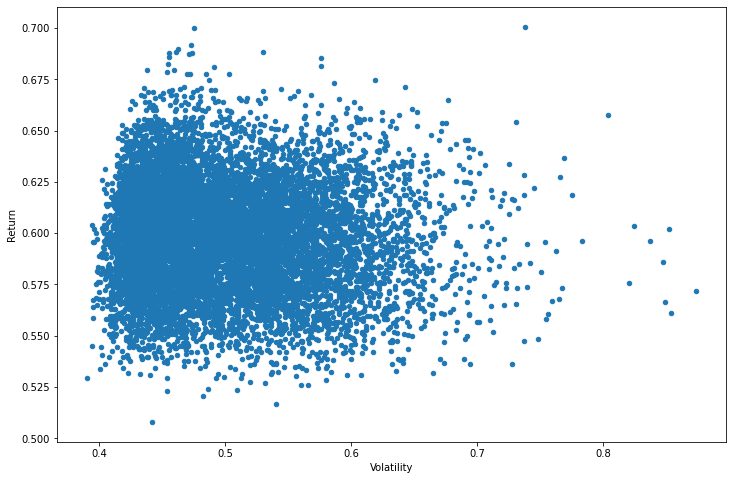

In [88]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(12, 8));

## Sharpe Ratio

People want to maximize returns while avoiding as much risk as possible. William Sharpe created the Sharpe Ratio to find the portfolio that provides the best return for the lowest amount of risk.

As return increases so does the Sharpe Ratio, but as Standard Deviation increase the Sharpe Ration decreases.

In [89]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < num_stocks:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[SR_idx])
      
# Find return of that portfolio
print("Return :", p_ret[SR_idx])

Stock : ENPH : 14.44
Stock : APPS : 16.80
Stock : CDNA : 7.44
Stock : ARWR : 10.97
Stock : ATLC : 14.04
Stock : CELH : 1.74
Stock : OAS : 0.22
Stock : VERU : 7.51
Stock : PLUG : 2.05
Stock : AMTX : 3.23
Stock : IIPR : 17.02
Stock : FRPT : 4.52

Volatility : 0.41769610570655896
Return : 0.6526427543160583


**Example**

Find percentage closest to 1 and use it as the basis for calculating all other shares Since CBRE is .6 : CALX is 7.25 : Multiply cost of CBRE (105.64) by 7 and then divide that by the cost of CALX to get the shares to buy for GNRC

105.64 7 = 739.48 / 64.28 = 25.49 (11 Shares) 64.28 = 707.08

In situations in which prices don't work either discard stock or force 1 share

In [90]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)
    
    # Holds the number of shares for each
    shares = []
    
    # Holds Cost of shares for each
    cost_shares = []
    
    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock 
        max_price = one_price * wts[i]
        
        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])
        
        # If the user wants to force buying one share do it
        if(force_one & (num_shares == 0)):
            num_shares = 1
        
        shares.append(num_shares)
        
        # Gets cost of those shares and appends to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
        
    return shares, cost_shares

## Get Portfolio Weighting

In [91]:
def get_port_weighting(share_cost):
    
    # Holds weights for stocks
    stock_wts = []
    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)
    
    for x in share_cost:
        stock_wts.append(x / tot_val)
    return stock_wts

## Returns the Value of Portfolio by Date

In [93]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Close',  date, 
                                  date, *port_list)
    # Convert from dataframe to Python list
    port_prices = port_prices.values.tolist()
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    return port_prices

### Approximate Portfolio Weighting Based on Request